In [1]:
from ipynb.fs.full.Tokyo_deploy import *

/Users/karthikmahendra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3214: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [ ]:
# from collections import OrderedDict,Counter
# import numpy as np
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS

# nlp = spacy.load('en_core_web_sm')

# class TextRank4Keyword():
#     """Extract keywords from text"""
    
#     def __init__(self):
#         self.d = 0.85 # damping coefficient, usually is .85
#         self.min_diff = 1e-5 # convergence threshold
#         self.steps = 10 # iteration steps
#         self.node_weight = None # save keywords and its weight

    
#     def set_stopwords(self, stopwords):  
#         """Set stop words"""
#         for word in STOP_WORDS.union(set(stopwords)):
#             lexeme = nlp.vocab[word]
#             lexeme.is_stop = True
    
#     def sentence_segment(self, doc, candidate_pos, lower):
#         """Store those words only in cadidate_pos"""
#         sentences = []
#         for sent in doc.sents:
#             selected_words = []
#             for token in sent:
#                 # Store words only with cadidate POS tag
#                 if token.pos_ in candidate_pos and token.is_stop is False:
#                     if lower is True:
#                         selected_words.append(token.text.lower())
#                     else:
#                         selected_words.append(token.text)
#             sentences.append(selected_words)
#         return sentences
        
#     def get_vocab(self, sentences):
#         """Get all tokens"""
#         vocab = OrderedDict()
#         i = 0
#         for sentence in sentences:
#             for word in sentence:
#                 if word not in vocab:
#                     vocab[word] = i
#                     i += 1
#         return vocab
    
#     def get_token_pairs(self, window_size, sentences):
#         """Build token_pairs from windows in sentences"""
#         token_pairs = list()
#         for sentence in sentences:
#             for i, word in enumerate(sentence):
#                 for j in range(i+1, i+window_size):
#                     if j >= len(sentence):
#                         break
#                     pair = (word, sentence[j])
#                     if pair not in token_pairs:
#                         token_pairs.append(pair)
#         return token_pairs
        
#     def symmetrize(self, a):
#         return a + a.T - np.diag(a.diagonal())
    
#     def get_matrix(self, vocab, token_pairs):
#         """Get normalized matrix"""
#         # Build matrix
#         vocab_size = len(vocab)
#         g = np.zeros((vocab_size, vocab_size), dtype='float')
#         for word1, word2 in token_pairs:
#             i, j = vocab[word1], vocab[word2]
#             g[i][j] = 1
            
#         # Get Symmeric matrix
#         g = self.symmetrize(g)
        
#         # Normalize matrix by column
#         norm = np.sum(g, axis=0)
#         g_norm = np.divide(g, norm, where=norm!=0) # this is ignore the 0 element in norm
        
#         return g_norm
             
#     def analyze(self, text, 
#                 candidate_pos=['NOUN', 'PROPN'], 
#                 window_size=4, lower=False, stopwords=list()):
#         """Main function to analyze text"""
        
#         # Set stop words
#         self.set_stopwords(stopwords)
        
#         # Pare text by spaCy
#         doc = nlp(text)
        
#         # Filter sentences
#         sentences = self.sentence_segment(doc, candidate_pos, lower) # list of list of words
        
#         # Build vocabulary
#         vocab = self.get_vocab(sentences)
        
#         # Get token_pairs from windows
#         token_pairs = self.get_token_pairs(window_size, sentences)
        
#         # Get normalized matrix
#         g = self.get_matrix(vocab, token_pairs)
        
#         # Initionlization for weight(pagerank value)
#         pr = np.array([1] * len(vocab))
        
#         # Iteration
#         previous_pr = 0
#         for epoch in range(self.steps):
#             pr = (1-self.d) + self.d * np.dot(g, pr)
#             if abs(previous_pr - sum(pr))  < self.min_diff:
#                 break
#             else:
#                 previous_pr = sum(pr)

#         # Get weight for each node
#         node_weight = dict()
#         for word, index in vocab.items():
#             node_weight[word] = pr[index]
        
#         self.node_weight = node_weight
        
#         """return top number keywords"""
#         kw = []
#         node_weight = OrderedDict(sorted(self.node_weight.items(), key=lambda t: t[1], reverse=True))
#         for i, (key, value) in enumerate(node_weight.items()):
#            # print(key + ' - ' + str(value))
#             if value > 1:
#                 kw.append(key)
#         return ' '.join(kw)


In [ ]:
# tr4w = TextRank4Keyword()
# analyser = lambda x: tr4w.analyze(x, candidate_pos = ['NOUN', 'PROPN'], window_size=5, lower=False)

In [ ]:
# listings_clean_model['summary'] = listings_clean_model['summary'].dropna()

In [ ]:
# listings_clean_model['KW'] = listings_clean_model['summary'].apply(analyser)

In [ ]:
# # convert to lower case, remove numbers and punctuation and strip non-ASCII characters
# import re
# import string
# listings_clean_model['KW'] = listings_clean_model['KW'].apply(lambda x:str.lower(x))
# listings_clean_model['KW'] = listings_clean_model['KW'].apply(lambda x:re.sub("([^\x00-\x7F])+"," ",x))
# listings_clean_model['KW'] = listings_clean_model['KW'].apply(lambda x:x.translate(str.maketrans('', '', string.punctuation)))
# listings_clean_model['KW'] = listings_clean_model['KW'].apply(lambda x:''.join(i for i in x if not i.isdigit()))

In [ ]:
# # Join all summries to single string and then find the count of most repeated words. 
# words = (listings_clean_model['KW'].str.cat(sep=" ")).split()
# word_counts = Counter(words)
# for word, count in word_counts.most_common():
#     if count > 25:
#         print(f'{word} is repeated {count} times.')

# Add below features
is close to station,train,yamanote
is in shinjuku 
is in asakusa
close to airport, haneda, narita
is close to ikebukuro?
close to shibuya?
close to ueno?
akihabara,ginza,roppongi,harajuku,temple,shrine,okubo,Otsuka,nishi,tsukiji,ryogoku,shinagawa,kaminarimon,akasaka,ikebukuro


In [ ]:
# from wordcloud import WordCloud,STOPWORDS
# import matplotlib.pyplot as plt

In [ ]:
# def show_wordcloud(data, title = None):
    
    
#     '''funtion to produce and display wordcloud
#         taken 2 arguments
#         1.data to produce wordcloud
#         2.title of wordcloud'''
    
    
#     wordcloud = WordCloud(
#         background_color='white',
#         stopwords=set(STOPWORDS),
#         max_words=250,
#         max_font_size=40, 
#         scale=3,
#         random_state=1 # chosen at random by flipping a coin; it was heads
#     ).generate(str(data))

#     fig = plt.figure(1, figsize=(12, 12))
#     plt.axis('off')
#     if title: 
#         fig.suptitle(title, fontsize=20)
#         fig.subplots_adjust(top=2.3)

#     plt.imshow(wordcloud,interpolation="bilinear")
#     plt.show()

In [ ]:
# show_wordcloud(words)

In [ ]:
# listings_clean_model['KW']=listings_clean_model['KW'].apply(lambda x:x.split())

In [ ]:
# # add new features based on NLP analysis above.
# listings_clean_model['shinjuku']=listings_clean_model['KW'].apply(lambda x:1 if ('shinjuku') in x else 0)
# listings_clean_model['asakusa']=listings_clean_model['KW'].apply(lambda x:1 if ('asakusa') in x else 0)
# listings_clean_model['ikebukuro']=listings_clean_model['KW'].apply(lambda x:1 if ('ikebukuro') in x else 0)
# listings_clean_model['shibuya']=listings_clean_model['KW'].apply(lambda x:1 if ('shibuya') in x else 0)
# listings_clean_model['ueno']=listings_clean_model['KW'].apply(lambda x:1 if ('ueno') in x else 0)

In [ ]:
# listings_clean_model['station'] = listings_clean_model['KW'].apply(lambda x:any(item in x for item in 
#                                                                      ['station','train','yamanote']))

In [ ]:
# listings_clean_model['airport'] = listings_clean_model['KW'].apply(lambda x:any(item in x for item in 
#                                                                      ['airport','haneda','narita']))
# listings_clean_model['attractions']=listings_clean_model['KW'].apply(lambda x:any(item in x for item in 
#                                                                       ['akihabara','ginza','roppongi',
#                                                                        'harajuku','temple','shrine','okubo',
#                                                                        'Otsuka','nishi','tsukiji','ryogoku',
#                                                                        'shinagawa','kaminarimon','akasaka',
#                                                                         'ikebukuro']))

In [ ]:
# listings_clean_model.replace({False: 0, True: 1}, inplace=True)

In [2]:
df = listings_clean_model.drop(columns = ['summary'],axis=1)

In [3]:
df.dtypes

host_response_rate          int64
neighbourhood_cleansed    float64
property_type             float64
room_type                   int64
accommodates                int64
bathrooms                 float64
price                       int64
cleaning_fee                int64
minimum_nights              int64
instant_bookable            int64
kitchen                     int64
smoke_detector              int64
self_check_in               int64
hot_water                   int64
local_host                  int64
dtype: object

In [4]:
# #df = pd.get_dummies(listings_clean_model)
numerical_col = ['accommodates','bathrooms',
                 'cleaning_fee',
                'minimum_nights','price']
# Log transforming columns because some features are highly skewed. 
numerical_col = [i for i in numerical_col if i not in ['accommodates']] # Removing items not to be transformed

for col in numerical_col:
        df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
        df[col] = np.log(df[col])

#Target
y_price = df['price']
X_price = df.drop('price', axis=1)

In [5]:
y_price.head()

3    8.854665
6    9.102421
7    8.545781
8    9.195531
9    8.790117
Name: price, dtype: float64

In [6]:
# # Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_price = pd.DataFrame(scaler.fit_transform(X_price), columns=list(X_price.columns))

In [7]:
from sklearn.model_selection import train_test_split
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(
                                                           X_price, y_price, test_size=0.2, random_state=42)

In [8]:
X_train_price.head()

,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,cleaning_fee,minimum_nights,instant_bookable,kitchen,smoke_detector,self_check_in,hot_water,local_host
6906,99,3.0,2.0,1,3,0.693147,8.294050,0.000000,1,0,1,0,0,0
3141,98,0.0,0.0,1,2,0.000000,8.160518,0.693147,0,1,1,1,1,1
7244,100,3.0,0.0,0,3,0.405465,8.517193,0.000000,1,1,0,1,1,1
351,100,3.0,1.0,1,2,0.405465,-4.605170,0.000000,1,1,1,1,1,1
3003,100,3.0,1.0,1,6,0.000000,8.006368,0.000000,0,1,1,1,0,1


In [9]:
y_price.head()

3    8.854665
6    9.102421
7    8.545781
8    9.195531
9    8.790117
Name: price, dtype: float64

In [10]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train_price, y_train_price)
training_preds_xgb_reg = xgb_reg.predict(X_train_price)
val_preds_xgb_reg = xgb_reg.predict(X_test_price)

print("\nTraining MSE:", round(mean_squared_error(y_train_price, training_preds_xgb_reg),3))
print("Validation MSE:", round(mean_squared_error(y_test_price, val_preds_xgb_reg),3))

[20:10:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.365
Validation MSE: 0.342


In [11]:
print("\nTraining r2:", round(r2_score(y_train_price, training_preds_xgb_reg),3))
print("Validation r2:", round(r2_score(y_test_price, val_preds_xgb_reg),3))


Training r2: 0.543
Validation r2: 0.525


In [12]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train_price.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
#ft_weights_xgb_reg

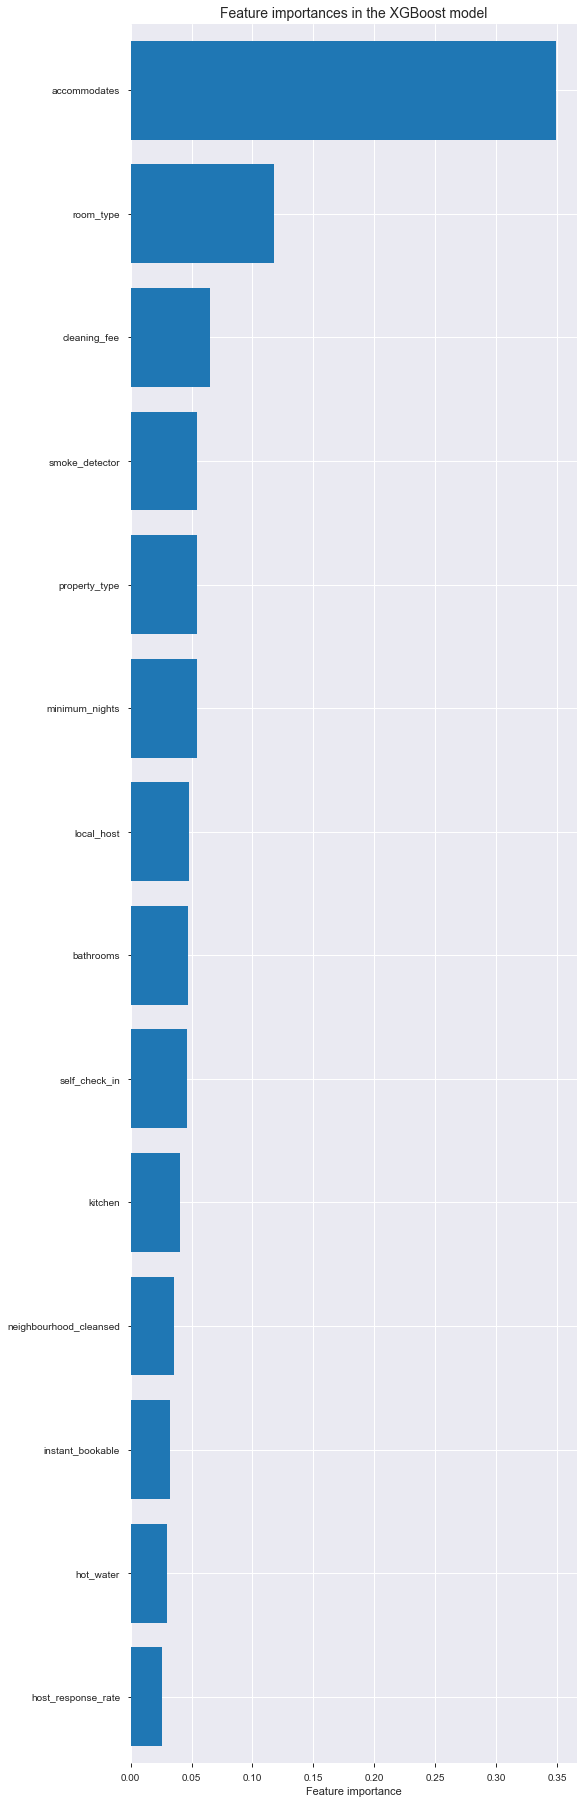

In [13]:
# Drop feature weights of 0 
ft_weights_xgb_reg = ft_weights_xgb_reg[(ft_weights_xgb_reg != 0).all(1)]

# Plotting feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(8,32))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [14]:
import pickle 

# Pickle the darn thing! 🥒
model_name = '/Users/karthikmahendra/Desktop/AirBnB/ABB.pkl' # path to where you want the file
pickle.dump(xgb_reg, open(model_name, 'wb')) # kitty = the name of your model 

In [15]:
X_tst = X_train_price[:1]
y_tst = y_train_price[:1]

In [16]:
np.exp(y_tst)

6906    6021.0
Name: price, dtype: float64

In [17]:
loaded_model = pickle.load(open(model_name, 'rb'))
result = np.exp(loaded_model.predict(X_tst))
print (result)

[20:10:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[7739.2393]


In [ ]:
df.shape

In [ ]:
X_price.shape

In [ ]:
(X_tst)